# Working with data 2019

## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## Structure
1. RECAP
    - 1.1 Maps
    - 1.2 Regressions
        - 1.2.1 Summary
        - 1.2.2 Interpretation
2. Dealing with time series
3. Panel models

In [1]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np
    

/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# 1. RECAP

# 1.1 Maps

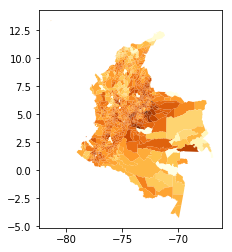

In [10]:
import geopandas as gp
map_data = gp.read_file("./data/colombia_merged/colombia_merged.shp")
map_data.plot(column="Participat",cmap="YlOrBr")

# 1.2 Missing data
- MCAR (Missing completely at random) --> Any method works
- MAR (Missing at random) --> Imputation works
- MNAR (Missing not at random) --> In practice imputation works if you have several correlated variables

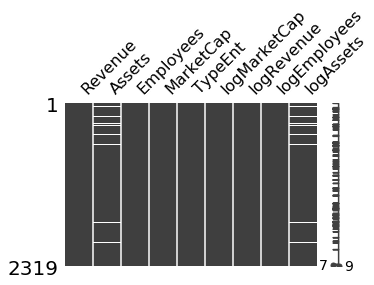

In [11]:
#Imputation (!pip install fancyimpute)
from fancyimpute import KNN
import missingno as msn

#Read data
df = pd.read_csv("./data/big3missing.csv",usecols=["MarketCap","Revenue","Employees","Assets","TypeEnt","logMarketCap","logRevenue","logEmployees","logAssets","TypeEnt"])

#Check missing value
msn.matrix(df,figsize=(5,3))

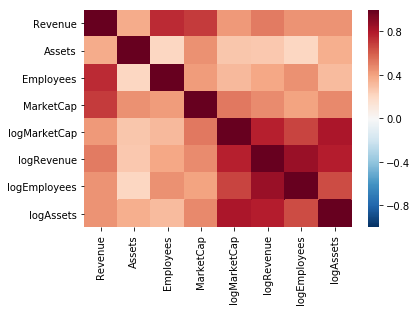

In [12]:
#Check correlation between varialbes
sns.heatmap(df.corr("pearson"),cmap="RdBu_r",vmin=-1,vmax=1)

In [13]:
#imputation (in practise you'd need to show this works, for example by first adding some missing data and see how well you can impute it)
df.loc[:,["logAssets","logEmployees","logMarketCap","logRevenue"]] = KNN(k=10).fit_transform(df.loc[:,["logAssets","logEmployees","logMarketCap","logRevenue"]] )

/opt/anaconda/anaconda3/lib/python3.5/site-packages/knnimpute/normalized_distance.py:62: RuntimeWarning: invalid value encountered in subtract
  np.subtract(X, x.reshape((1, n_cols)), out=diffs)


Imputing row 1/2319 with 1 missing, elapsed time: 0.543
Imputing row 101/2319 with 0 missing, elapsed time: 0.544
Imputing row 201/2319 with 0 missing, elapsed time: 0.544
Imputing row 301/2319 with 0 missing, elapsed time: 0.545
Imputing row 401/2319 with 0 missing, elapsed time: 0.545
Imputing row 501/2319 with 0 missing, elapsed time: 0.546
Imputing row 601/2319 with 1 missing, elapsed time: 0.546
Imputing row 701/2319 with 0 missing, elapsed time: 0.547
Imputing row 801/2319 with 0 missing, elapsed time: 0.547
Imputing row 901/2319 with 0 missing, elapsed time: 0.548
Imputing row 1001/2319 with 0 missing, elapsed time: 0.549
Imputing row 1101/2319 with 0 missing, elapsed time: 0.549
Imputing row 1201/2319 with 0 missing, elapsed time: 0.549
Imputing row 1301/2319 with 0 missing, elapsed time: 0.550
Imputing row 1401/2319 with 0 missing, elapsed time: 0.550
Imputing row 1501/2319 with 0 missing, elapsed time: 0.551
Imputing row 1601/2319 with 1 missing, elapsed time: 0.552
Imputing 

In [14]:
#Keep only rows where the financials are greater than 0
df = df.loc[df["logRevenue"]>0]
df = df.loc[df["logEmployees"]>0]
df = df.loc[df["logMarketCap"]>0]

# 1.3. Regressions
- Binomial test: When you have *count data* and you want to see if you would expect to see at least that many observations given a probability. e.g. you have how many journalists were killed in a country, and want to see if the probability of being killed for journalists is higher than for the population.
- Chi2 test: Test association between *two categorical variables*
- t-test, anova, tukey: Test if the *mean* of 2 (t-test) or more (anova, tukey) groups is different
- Regression: When you want to understand the effect of x on y

## 1.3.1 When to use what type of regressions
Depending on the dependent variable (DV)
- Binomial DV --> Logistic regression (logit) or probit regression
- DV represents count data --> Poisson regression / Negative binomial / zero-inflated negative binomial
- Continuous DV --> OLS, multilevel or panel regression

Within continuous DV
- Repeated measures (e.g. country, or year): 
  - Nested structure: Students within class within school: Multilevel regression (mixedlm)
  - Time information: Panel models (within or between models, also called fixed and random effects)
- Otherwise: OLS

## 1.3.2 Interpreting regressions

In [15]:
#Library for linear regression
import statsmodels.formula.api as smf


In [16]:
#The high condition number tells us this regression is not valid, but just for the interpretation
mod0 = smf.ols(formula='MarketCap ~ Revenue + TypeEnt', data=df)
res_ols0 = mod0.fit()
print(res_ols0.summary())

#Interpretation: Incresae of $1000k in revenue makes MarketCap increse by $1095.
#Interpretation: If the company is an industrial corporation, the MarketCap is 1.3 millions below the MarketCap of the control group (banks)

                            OLS Regression Results                            
Dep. Variable:              MarketCap   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 27 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:13:43   Log-Likelihood:                -42249.
No. Observations:                2313   AIC:                         8.450e+04
Df Residuals:                    2310   BIC:                         8.452e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [17]:
#The high condition number tells us this regression is not valid, but just for the interpretation
mod0 = smf.ols(formula='logMarketCap ~ logRevenue + TypeEnt', data=df)
res_ols0 = mod0.fit()
print(res_ols0.summary())

#Interpretation: Incresae of 1% in revenue makes MarketCap increse by 0.88%
#Interpretation: If the company is an industrial corporation, the MarketCap is 10^(-0.3684) = 0.44 (44% of the MarketCap of the control group)

                            OLS Regression Results                            
Dep. Variable:           logMarketCap   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1985.
Date:                Sun, 27 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:13:44   Log-Likelihood:                -1612.3
No. Observations:                2313   AIC:                             3231.
Df Residuals:                    2310   BIC:                             3248.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [18]:
#The high condition number tells us this regression is not valid, but just for the interpretation
mod0 = smf.ols(formula='logMarketCap ~ Revenue + TypeEnt', data=df)
res_ols0 = mod0.fit()
print(res_ols0.summary())

#Interpretation: Incresae of 186,800,000/100 = $1.86M increases MarketCap by 1%

                            OLS Regression Results                            
Dep. Variable:           logMarketCap   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     274.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):          1.26e-107
Time:                        23:13:44   Log-Likelihood:                -2522.4
No. Observations:                2313   AIC:                             5051.
Df Residuals:                    2310   BIC:                             5068.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [19]:
#The high condition number tells us this regression is not valid, but just for the interpretation
mod0 = smf.ols(formula='MarketCap ~ logRevenue + TypeEnt', data=df)
res_ols0 = mod0.fit()
print(res_ols0.summary())

#Interpretation: Incresae of 1% of revenue increases MarketCap by 19,470,000/100 = $0.2M

                            OLS Regression Results                            
Dep. Variable:              MarketCap   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     350.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):          8.17e-134
Time:                        23:13:45   Log-Likelihood:                -42725.
No. Observations:                2313   AIC:                         8.546e+04
Df Residuals:                    2310   BIC:                         8.547e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

# 2. Time series
- User the option: parse_dates=["column"] when reading the file
- Sometimes it is useful to handle dates explicitly, for example to interpolate, or to reduce the granularity of the data

## 2.1 Read file

In [129]:
df = pd.read_csv("data/exchange-rate-twi-may-1970-aug-1.tsv",sep="\t",parse_dates=["Month"],skipfooter=2)
df.columns = ["Date","Rate"]
df.head()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Date,Rate
0,1970-05-01,100.0
1,1970-06-01,99.6
2,1970-07-01,99.4
3,1970-08-01,99.1
4,1970-09-01,99.2


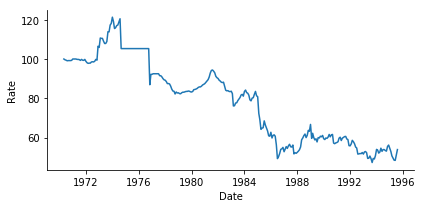

In [130]:
#Let's visualize it
sns.relplot(x="Date",y="Rate",data=df,kind="line",aspect=2,height=3)

## 2.2 Filter by time

In [25]:
#Now pandas understand this kind of expressions
df_after1980 = df.loc[df["Date"] > "1980-05-02"] #year-month-date
df_after1980.head()

,Date,Rate
121,1980-06-01,85.0
122,1980-07-01,85.5
123,1980-08-01,85.8
124,1980-09-01,85.8
125,1980-10-01,86.2


## 2.3 dt methods
Similar to the str methods to work with strings (e.g. df["country"].str.lower())

In [26]:
#make columns with year and month (useful for models)
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df.head()

,Date,Rate,Year,Month
0,1970-05-01,100.0,1970,5
1,1970-06-01,99.6,1970,6
2,1970-07-01,99.4,1970,7
3,1970-08-01,99.1,1970,8
4,1970-09-01,99.2,1970,9


## 2.4. You can resample the data with a specific frequency
- Very similar to groupby.
- Groups the data with a specific frequency
    - "A" = End of year
    - "B" = Business day
    - others: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
- Then you tell pandas to apply a function to the group (mean/max/median...)
- Unevenly spaced time series --> Evenly spaced time series (**much better**)

In [27]:
#resample
df_resampled = df.resample("A",on="Date").mean().reset_index()
df_resampled.head()

,Date,Rate,Year,Month
0,1970-12-31,99.375000,1970.0,8.5
1,1971-12-31,99.741667,1971.0,6.5
2,1972-12-31,99.225000,1972.0,6.5
3,1973-12-31,111.208333,1973.0,6.5
4,1974-12-31,113.883333,1974.0,6.5


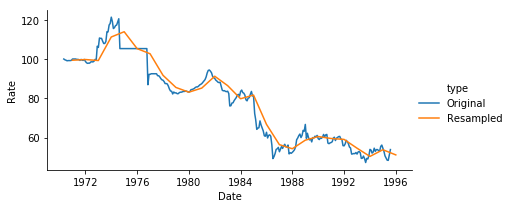

In [28]:
#Let's visualize it

#Concatenate both datasets (original and resmamples)
df_resampled["type"] = 'Resampled'
df["type"] = 'Original'
combined = pd.concat([df,df_resampled])

#Visualize it
sns.relplot(x="Date",y="Rate",data=combined,hue="type",kind="line",aspect=2,height=3)


**Resample by group**

In [ ]:
df = pd.read_csv("data/test.csv")
grouper = df.groupby([pd.Grouper(key="year",freq='A'), 'country'])
result = grouper.mean().reset_index()
result

## 2.5 Interpolate
- Handling missing data when we have time information
- Observations next to each other in time are likely correlated, we can use it to impute the missing data

In [29]:
df_small = df.head(20).copy()
df_small.loc[np.random.random(size=20)<0.2,"Rate"] = np.NaN
df_small.head()

,Date,Rate,Year,Month,type
0,1970-05-01,100.0,1970,5,Original
1,1970-06-01,99.6,1970,6,Original
2,1970-07-01,99.4,1970,7,Original
3,1970-08-01,99.1,1970,8,Original
4,1970-09-01,NaN,1970,9,Original


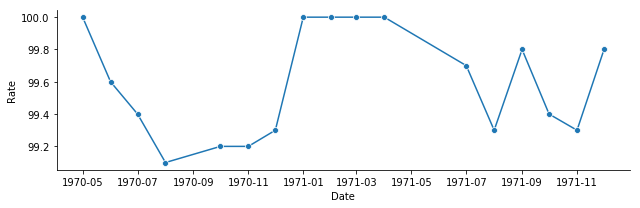

In [31]:
#Linear interpolation
df_small["Rate_filled"] = df_small["Rate"].interpolate()
sns.relplot(x="Date",y="Rate",data=df_small,kind="line",aspect=3,height=3,marker="o")


In [131]:
#Forward interpolation
df_small["Rate_ffill"] = df_small["Rate"].interpolate(method="ffill")
#Backwards interpolation
df_small["Rate_bfill"] = df_small["Rate"].interpolate(method="bfill")
#Nearest interpolation
df_small["Rate_nearest"] = df_small["Rate"].interpolate(method="nearest")
df_small.head(10)

,Date,Rate,Year,Month,type,Rate_filled,Rate_ffill,Rate_bfill,Rate_nearest
0,1970-05-01,100.0,1970,5,Original,100.00,100.0,100.0,100.0
1,1970-06-01,99.6,1970,6,Original,99.60,99.6,99.6,99.6
2,1970-07-01,99.4,1970,7,Original,99.40,99.4,99.4,99.4
3,1970-08-01,99.1,1970,8,Original,99.10,99.1,99.1,99.1
4,1970-09-01,NaN,1970,9,Original,99.15,99.1,99.2,99.1
5,1970-10-01,99.2,1970,10,Original,99.20,99.2,99.2,99.2
6,1970-11-01,99.2,1970,11,Original,99.20,99.2,99.2,99.2
7,1970-12-01,99.3,1970,12,Original,99.30,99.3,99.3,99.3
8,1971-01-01,100.0,1971,1,Original,100.00,100.0,100.0,100.0
9,1971-02-01,100.0,1971,2,Original,100.00,100.0,100.0,100.0


### Interpolate the entire dataframe
- Allow us to deal with unevenly spaced time series

In [49]:
df_index = df_small.set_index("Date")
df_index.head()

,Rate,Year,Month,type,Rate_filled,Rate_ffill,Rate_bfill,Rate_nearest
Date,,,,,,,,
1970-05-01,100.0,1970,5,Original,100.00,100.0,100.0,100.0
1970-06-01,99.6,1970,6,Original,99.60,99.6,99.6,99.6
1970-07-01,99.4,1970,7,Original,99.40,99.4,99.4,99.4
1970-08-01,99.1,1970,8,Original,99.10,99.1,99.1,99.1
1970-09-01,NaN,1970,9,Original,99.15,99.1,99.2,99.1


In [50]:
#Method = time will work even in case of unevenlty spaced data
df_index = df_index.interpolate(method="time")
df_index.head()

,Rate,Year,Month,type,Rate_filled,Rate_ffill,Rate_bfill,Rate_nearest
Date,,,,,,,,
1970-05-01,100.00000,1970,5,Original,100.00,100.0,100.0,100.0
1970-06-01,99.60000,1970,6,Original,99.60,99.6,99.6,99.6
1970-07-01,99.40000,1970,7,Original,99.40,99.4,99.4,99.4
1970-08-01,99.10000,1970,8,Original,99.10,99.1,99.1,99.1
1970-09-01,99.15082,1970,9,Original,99.15,99.1,99.2,99.1


In [51]:
#Remember to reset the index if you don't like working with them
df_index = df_index.reset_index()
df_index.head()

,Date,Rate,Year,Month,type,Rate_filled,Rate_ffill,Rate_bfill,Rate_nearest
0,1970-05-01,100.00000,1970,5,Original,100.00,100.0,100.0,100.0
1,1970-06-01,99.60000,1970,6,Original,99.60,99.6,99.6,99.6
2,1970-07-01,99.40000,1970,7,Original,99.40,99.4,99.4,99.4
3,1970-08-01,99.10000,1970,8,Original,99.10,99.1,99.1,99.1
4,1970-09-01,99.15082,1970,9,Original,99.15,99.1,99.2,99.1


### Interpolation by group
- If we have many time series, one for each group (e.g. longitudinal information on cities)

In [56]:
df_small.groupby('Month').apply(lambda group: group.interpolate(method='index'))

,Date,Rate,Year,Month,type,Rate_filled,Rate_ffill,Rate_bfill,Rate_nearest
0,1970-05-01,100.0,1970,5,Original,100.00,100.0,100.0,100.0
1,1970-06-01,99.6,1970,6,Original,99.60,99.6,99.6,99.6
2,1970-07-01,99.4,1970,7,Original,99.40,99.4,99.4,99.4
3,1970-08-01,99.1,1970,8,Original,99.10,99.1,99.1,99.1
4,1970-09-01,NaN,1970,9,Original,99.15,99.1,99.2,99.1
5,1970-10-01,99.2,1970,10,Original,99.20,99.2,99.2,99.2
6,1970-11-01,99.2,1970,11,Original,99.20,99.2,99.2,99.2
7,1970-12-01,99.3,1970,12,Original,99.30,99.3,99.3,99.3
8,1971-01-01,100.0,1971,1,Original,100.00,100.0,100.0,100.0
9,1971-02-01,100.0,1971,2,Original,100.00,100.0,100.0,100.0


## 2.6 Lagged variables
- Sometimes we want to see the effect of x on y, but the effected is delayed (think changes in the education system affecting the workforce composition)
- Then we need to lag one of the variables 

In [57]:
#Create a test dataset
df_byyear = df.sort_values(by="Month")[["Year","Month","Rate"]]
df_byyear.columns = ["Year","Group","Rate"]
df_byyear.head()

,Year,Group,Rate
188,1986,1,62.7
272,1993,1,51.6
56,1975,1,105.3
260,1992,1,55.8
68,1976,1,105.3


In [58]:
#Shift the rate by one (year). Make sure all years are there by resampling!
df_byyear["Rate_1"] = df_byyear.groupby(['Group'])['Rate'].shift(1)
df_byyear.head()

,Year,Group,Rate,Rate_1
188,1986,1,62.7,NaN
272,1993,1,51.6,62.7
56,1975,1,105.3,51.6
260,1992,1,55.8,105.3
68,1976,1,105.3,55.8


# 3. Panel data

## 3.1 Longitudinal vs cross-sectional
- Having time information is great:
    - Allow us to test for Granger causality (x happens before y, thus x could be a cause of y)
    - Allow us to increase the number of observations
- Having time information is terrible:
    - The observations are not independent anymore, we need to use hierarchical models.
        - Pooled OLS (not a hierarchical model, usually not appropriate)
        - **Between model** (also called random effects model)
            - Looks at the effects of changes of x in y in time within and between individuals at the same time.
            - If you have an omitted variables (and it is correlated with one of your independent variables) you'll have a problem.
            - If you don't have an omitted variable then it's great.
        - **Within model** (also called fixed effects model)
            - Looks at the effects of changes of x in y in time only within individuals.
            - The fixed effects are the subject-specific means.
            - If the subjects don't change much in time you have a problem.
            - You cannot include time-invariant values (such as gender).
        - Mundlack. 
            - Looks at the effects of changes of x in y in time within and between individuals differenciating between the two.
            - It's always great.
    - If your aim is to predict or to look at complex time relationships that you cannot control for then you need to use other type of models such as AR, I, MA (or a combination).
    
Note: Panel means you have repeated measurements for each individual (or whatever your unit of analysis is).

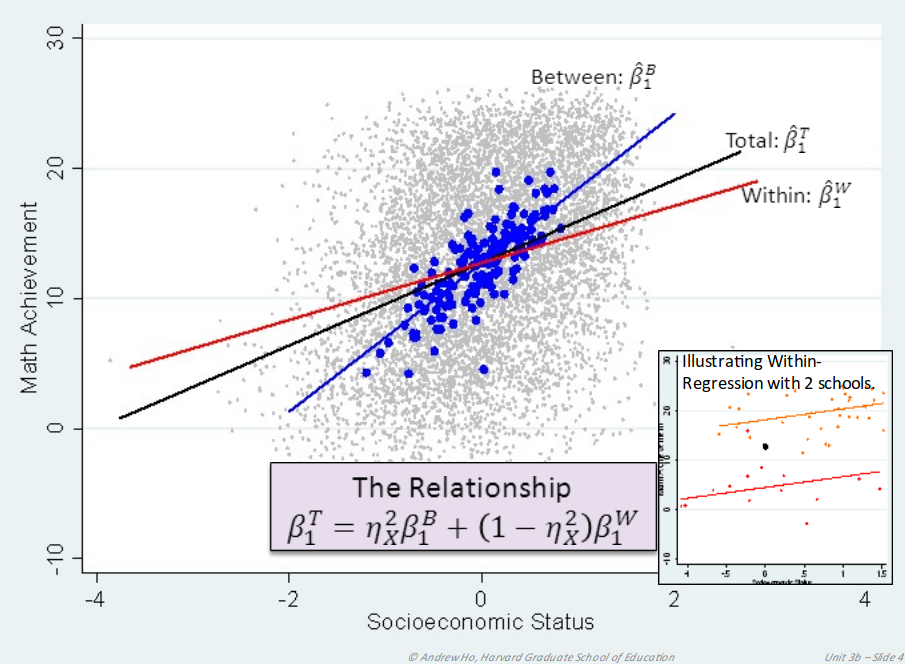

In [137]:
Image("images/within_between.png",width=500)

**Library**
- linearmodels
- You need to give the observation and year as an index 

In [62]:
from linearmodels import PanelOLS,PooledOLS,RandomEffects

In [100]:
from statsmodels.datasets import grunfeld
data = grunfeld.load_pandas().data
data.year = data.year.astype(np.int64)
data_mixed = data.copy()
data = data.set_index(['firm','year'])
data.head()

invest   value  capital
firm              year                         
b'General Motors' 1935   317.6  3078.5      2.8
                  1936   391.8  4661.7     52.6
                  1937   410.6  5387.1    156.9
                  1938   257.7  2792.2    209.2
                  1939   330.8  4313.2    203.4

## 3.1 Pooled OLS
- It is a normal regression

In [101]:
#Pooled OLS
mod_pooled = PooledOLS.from_formula('invest ~ 1 + value + capital', data)
res_pooled = mod_pooled.fit(cov_type='clustered', cluster_entity=True)
print(res_pooled.summary)

print("-"*100)
print("Coefficiends of an OLS")
print(smf.ols(formula = 'invest ~ value + capital', data=data_mixed).fit().params)


                          PooledOLS Estimation Summary                          
Dep. Variable:                 invest   R-squared:                        0.8179
Estimator:                  PooledOLS   R-squared (Between):              0.8426
No. Observations:                 220   R-squared (Within):               0.7357
Date:                Sun, Jan 27 2019   R-squared (Overall):              0.8179
Time:                        23:36:47   Log-likelihood                   -1301.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      487.28
Entities:                          11   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(2,217)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             52.506
                            

/opt/anaconda/anaconda3/lib/python3.5/site-packages/linearmodels/panel/model.py:603: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = lstsq(wx, wy)[0]


#https://www.statalist.org/forums/forum/general-stata-discussion/general/1314121-r-squared-within-between-overall
 - Between R2 is "How much of the variance between seperate panel units does my model account for"
 - Within R2 is "How much of the variance within the panel units does my model account for"
 - Overall R2 is a weighted average of these two.

## 3.2 Between regression
- Idea: Looks both at the within and the between variability
- More efficient than within.
- When to use it:
    - If we believe there is no omitted variable bias
    - If we are interested in time-invariant variables (gender, sector, country...)
- Simpsons paradox goes here!

In [102]:
#Code
mod_between = RandomEffects.from_formula('invest ~ 1 + value + capital + EntityEffects', data)
res_between = mod_between.fit(cov_type='clustered', cluster_entity=True)
print(res_between.variance_decomposition)
print(res_between.theta.head()) #1 = pooled
print(res_between.summary)


#Compare with the mixedlm from the previous day (should be very similar)
print("="*100)
print("Coefficiends of a mixed LM")
print(smf.mixedlm(formula = 'invest ~ value + capital', groups="firm",data=data_mixed).fit().params)

/opt/anaconda/anaconda3/lib/python3.5/site-packages/linearmodels/panel/model.py:1731: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]
/opt/anaconda/anaconda3/lib/python3.5/site-packages/linearmodels/panel/model.py:1736: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(wxbar, wybar)[0]
/opt/anaconda/anaconda3/lib/python3.5/site-packages/linearmodels/panel/model.py:1770: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)

Effects                   6201.934625
Residual                  2530.041846
Percent due to Effects       0.710256
Name: Variance Decomposition, dtype: float64
                         theta
entity                        
b'General Motors'     0.858616
b'US Steel'           0.858616
b'General Electric'   0.858616
b'Chrysler'           0.858616
b'Atlantic Refining'  0.858616
                        RandomEffects Estimation Summary                        
Dep. Variable:                 invest   R-squared:                        0.7700
Estimator:              RandomEffects   R-squared (Between):              0.8204
No. Observations:                 220   R-squared (Within):               0.7666
Date:                Sun, Jan 27 2019   R-squared (Overall):              0.8080
Time:                        23:37:03   Log-likelihood                   -1172.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:     

## 3.3 Within regression
- Looks only within the group
- No time invariant things (like gender)
- When to use it:
    - If we suspect of omitted variable bias
    - If we are not interested in time-invariant variables (gender, sector, country...)
- Only feasible if enough variability within subjects (usually many years)


In [123]:
mod_within = PanelOLS.from_formula('invest ~ 1 + value + capital + EntityEffects', data)
res_within = mod_within.fit(cov_type='clustered', cluster_entity=True)
print(res_within.variance_decomposition)
print(res_within.summary)

Effects                   6133.752486
Residual                  2380.539374
Percent due to Effects       0.720407
Name: Variance Decomposition, dtype: float64
                          PanelOLS Estimation Summary                           
Dep. Variable:                 invest   R-squared:                        0.7667
Estimator:                   PanelOLS   R-squared (Between):              0.8193
No. Observations:                 220   R-squared (Within):               0.7667
Date:                Sun, Jan 27 2019   R-squared (Overall):              0.8071
Time:                        23:44:01   Log-likelihood                   -1167.4
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      340.08
Entities:                          11   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(2,207)
Min Obs:                       

/opt/anaconda/anaconda3/lib/python3.5/site-packages/linearmodels/panel/model.py:1164: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(x, y)[0]
/opt/anaconda/anaconda3/lib/python3.5/site-packages/linearmodels/panel/model.py:1223: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  weps_pooled = wy - wx @ np.linalg.lstsq(wx, wy)[0]


## Compare models
- Pooled always maximize overall r2 (this is not necessarily good)

In [124]:
from linearmodels.panel import compare #for ols we had a different function, see the other notebeook (class 9)
compare({'Between':res_between,'Within':res_within,'Pooled':res_pooled})

,Between,Pooled,Within
Dep. Variable,invest,invest,invest
Estimator,RandomEffects,PooledOLS,PanelOLS
No. Observations,220,220,220
Cov. Est.,Clustered,Clustered,Clustered
R-squared,0.7700,0.8179,0.7667
R-Squared (Within),0.7666,0.7357,0.7667
R-Squared (Between),0.8204,0.8426,0.8193
R-Squared (Overall),0.8080,0.8179,0.8071
F-statistic,363.21,487.28,340.08
P-value (F-stat),0.0000,0.0000,0.0000


In [125]:
#more examples
#https://bashtage.github.io/linearmodels/doc/panel/examples/examples.html

In [126]:
import rpy2
%load_ext rpy2.ipython
%R require("plm")

/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: plm

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: Formula

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

In [127]:
noindex = data.reset_index()
noindex.head()

,firm,year,invest,value,capital
0,b'General Motors',1935,317.6,3078.5,2.8
1,b'General Motors',1936,391.8,4661.7,52.6
2,b'General Motors',1937,410.6,5387.1,156.9
3,b'General Motors',1938,257.7,2792.2,209.2
4,b'General Motors',1939,330.8,4313.2,203.4


In [128]:
%%R -i noindex

#Random effects
model_m_fR <- plm(invest~value+capital,
           data=noindex,
          index=c("firm","year"),
          model="within") #between for between models
print(summary(model_m_fR))


/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "firm". Fall back to string conversion. The error is: Element 0 contains more than one byte.
  (name, str(e)))
/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:190: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Oneway (individual) effect Within Model

Call:
plm(formula = invest ~ value + capital, data = noindex, model = "within", 
    index = c("firm", "year"))

Balanced Panel: n = 11, T = 20, N = 220

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-184.00792  -15.66024    0.27161   16.41421  250.75337 

Coefficients:
        Estimate Std. Error t-value  Pr(>|t|)    
value    0.11013    0.01130  9.7461 < 2.2e-16 ***
capital  0.31003    0.01654 18.7439 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    2244500
Residual Sum of Squares: 523720
R-Squared:      0.76667
Adj. R-Squared: 0.75314
F-statistic: 340.079 on 2 and 207 DF, p-value: < 2.22e-16
